<a href="https://colab.research.google.com/github/erichilarysmithsr/ADPL/blob/master/copy_of_fods_session5_statisticsandprobability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

[seaborn](https://seaborn.pydata.org/tutorial/introduction.html)

[matplotlib](https://matplotlib.org/stable/)


In [ ]:
# Exercise 1: Descriptive Statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(url)

In [ ]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print(titanic.head())

NameError: name 'titanic' is not defined

In [ ]:
# Descriptive statistics
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
print(titanic['Survived'].describe())

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


### Skewness and Kurtosis

Skewness:
Normal           0.033859
Positive Skew    1.740691
Negative Skew   -2.525785
dtype: float64

Kurtosis:
Normal           -0.046766
Positive Skew     3.833356
Negative Skew    12.231776
dtype: float64


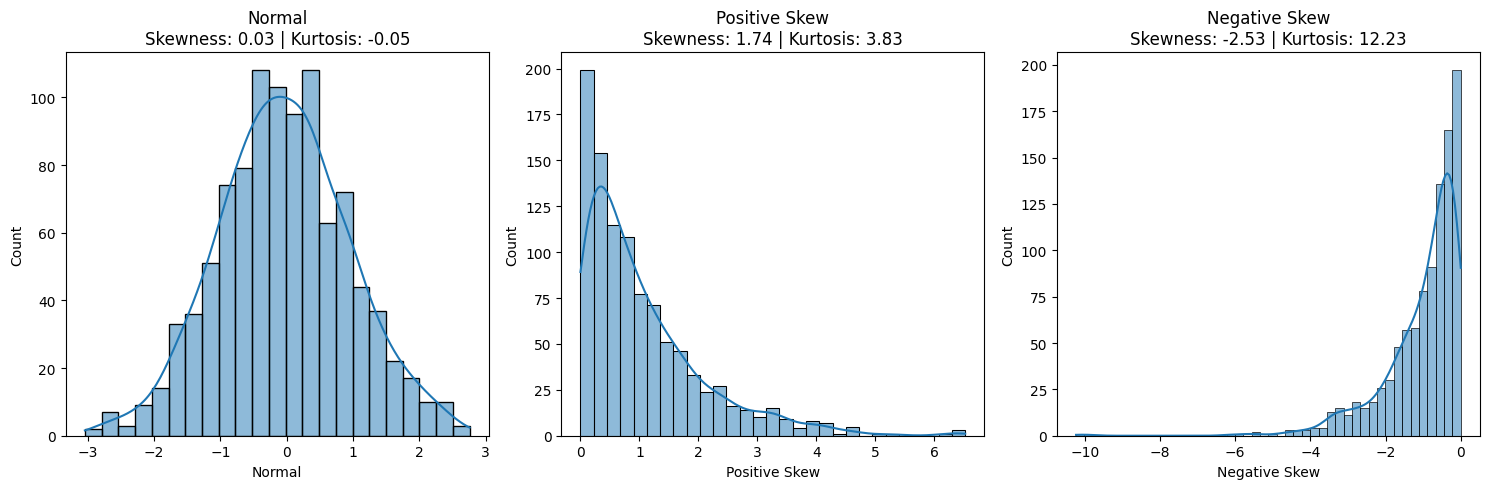

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Generate some example data
np.random.seed(0)
data_normal = np.random.normal(0, 1, 1000)  # Mesokurtic
data_positive_skew = np.random.exponential(1, 1000)  # Positive skew
data_negative_skew = -np.random.exponential(1, 1000)  # Negative skew

# Create a DataFrame
df = pd.DataFrame({
    'Normal': data_normal,
    'Positive Skew': data_positive_skew,
    'Negative Skew': data_negative_skew
})

# Calculate skewness and kurtosis
skewness = df.apply(skew)
kurt = df.apply(kurtosis)

print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurt)

# Plot the distributions
plt.figure(figsize=(15, 5))

for i, column in enumerate(df.columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f"{column}\nSkewness: {skew(df[column]):.2f} | Kurtosis: {kurtosis(df[column]):.2f}")

plt.tight_layout()
plt.show()


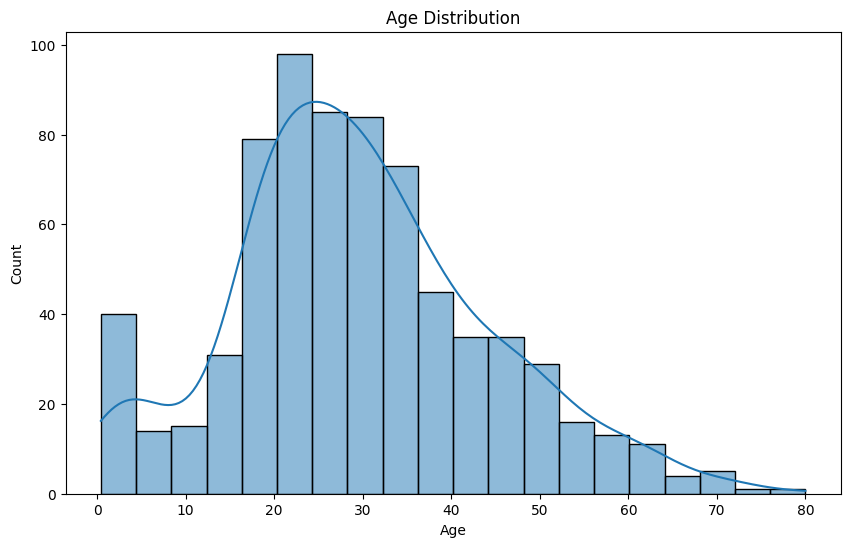

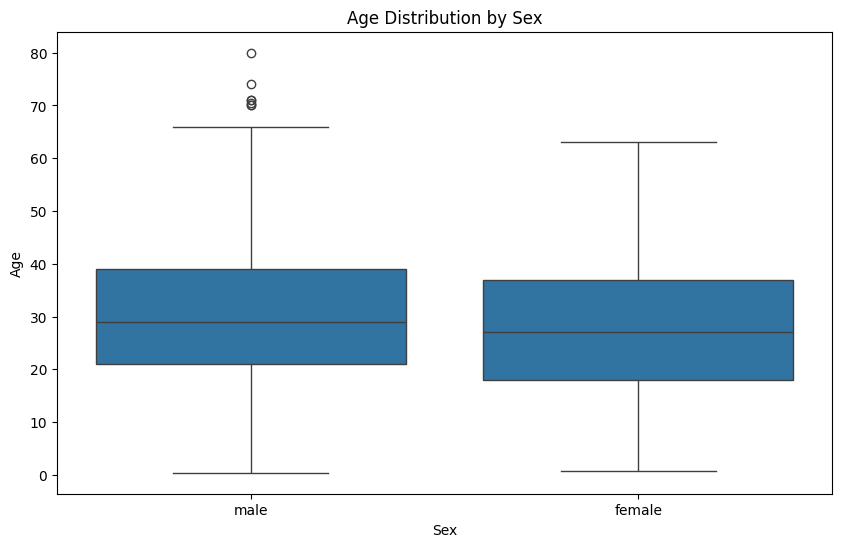

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age', data=titanic)
plt.title('Age Distribution by Sex')
plt.show()

In [ ]:
# Exercise 2: Inferential Statistics
from scipy import stats

In [ ]:
# Random sampling
sample_1 = titanic['Age'].dropna().sample(50, random_state=42)
sample_2 = titanic['Age'].dropna().sample(50, random_state=24)

In [ ]:
# t-test
t_stat, p_value = stats.ttest_ind(sample_1, sample_2)
# t-statistic is the difference of the average of 2 things
# big difference is like 3 or 4, diff of 0.5 - 1 is considered small
# p-value is how confident you are about the results of your test
# small (like 0.01) unlikely the difference happened by chance
# larger p-value (like 0.45) means the difference likely happened by random chance

print(f't-statistic: {t_stat}, p-value: {p_value}')

t-statistic: 0.7510917270110419, p-value: 0.4543972765073331


In [ ]:
# The Chi-Square test is a statistical test used to determine if there is a
# significant association between categorical variables.
contingency_table = pd.crosstab(titanic['Sex'], titanic['Survived'])
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 260.71702016732104, p-value: 1.1973570627755645e-58


In [ ]:
# Exercise 3: Basic Probability

In [ ]:
# Coin toss simulation
n_simulations = 10000
coin_tosses = np.random.choice(['H', 'T'], size=n_simulations)
prob_heads = np.sum(coin_tosses == 'H') / n_simulations
print(f'Probability of Heads: {prob_heads}')

Probability of Heads: 0.5007


In [ ]:
# Exercise 4: Probability Distributions

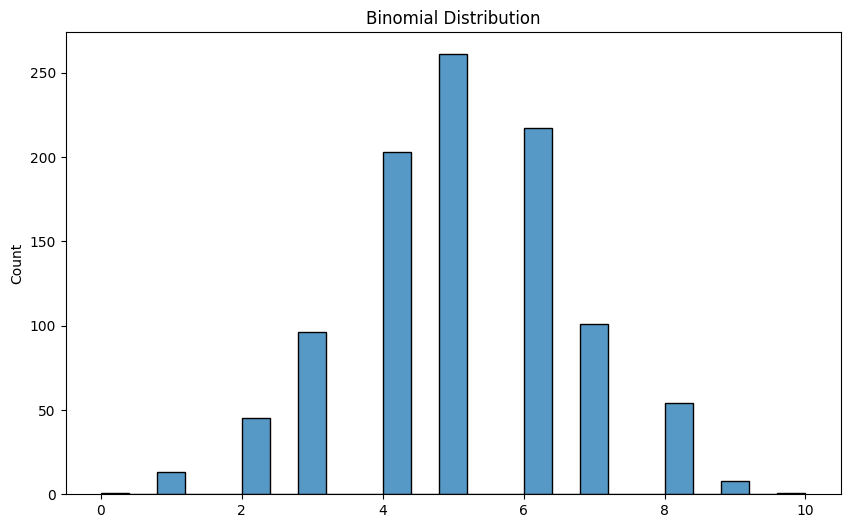

In [ ]:
# Binomial distribution
# A binomial distribution is a way to figure out how likely it is to get a
# certain number of successes (like heads) when you do an experiment
# (like flipping a coin) multiple times.
binom_dist = np.random.binomial(n=10, p=0.5, size=1000)
plt.figure(figsize=(10, 6))
sns.histplot(binom_dist, kde=False)
plt.title('Binomial Distribution')
plt.show()

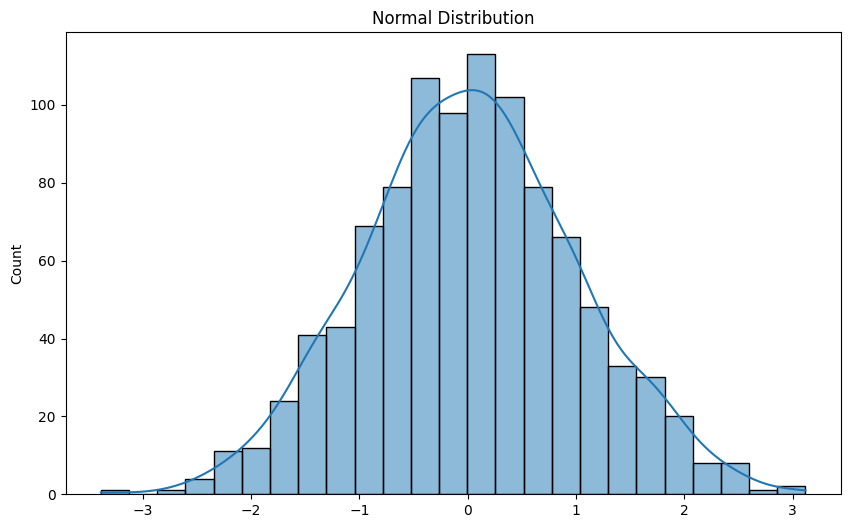

In [ ]:
# Normal distribution
# A normal distribution is a way to describe how numbers are spread out.
# It's often called a "bell curve" because it looks like a bell.
normal_dist = np.random.normal(loc=0, scale=1, size=1000)
plt.figure(figsize=(10, 6))
sns.histplot(normal_dist, kde=True)
plt.title('Normal Distribution')
plt.show()

In [ ]:
# Exercise 5: Bayesian Statistics

In [ ]:
# Applying Bayes' Theorem
# Imagine you have a bunch of blocks, and you want to build different shapes
# using these blocks. Bayes' Theorem is a mathematical rule that helps us
# understand the different ways we can put these blocks together to create
# various shapes.
prior_prob = 0.01
likelihood = 0.99
marginal_prob = (prior_prob * likelihood) + (0.99 * 0.01)
posterior_prob = (prior_prob * likelihood) / marginal_prob
print(f'Posterior Probability: {posterior_prob}')

Posterior Probability: 0.5
